<a href="https://colab.research.google.com/github/PratyushKattel/DL_and_ML/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [10]:
data=pd.read_csv('/content/sample_data/mnist_test.csv')


In [11]:
data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data=data.sample(frac=1).reset_index(drop=True)

In [13]:
data.columns

Index(['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
       '0.666', '0.667'],
      dtype='object', length=785)

In [14]:
X=data.iloc[:,1:]
y=data['7']

In [15]:
X.iloc[0,0]

np.int64(0)

In [16]:
X=np.reshape(X,(X.shape[0],28,28,1))

In [17]:
X

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [18]:
X.shape

(9999, 28, 28, 1)

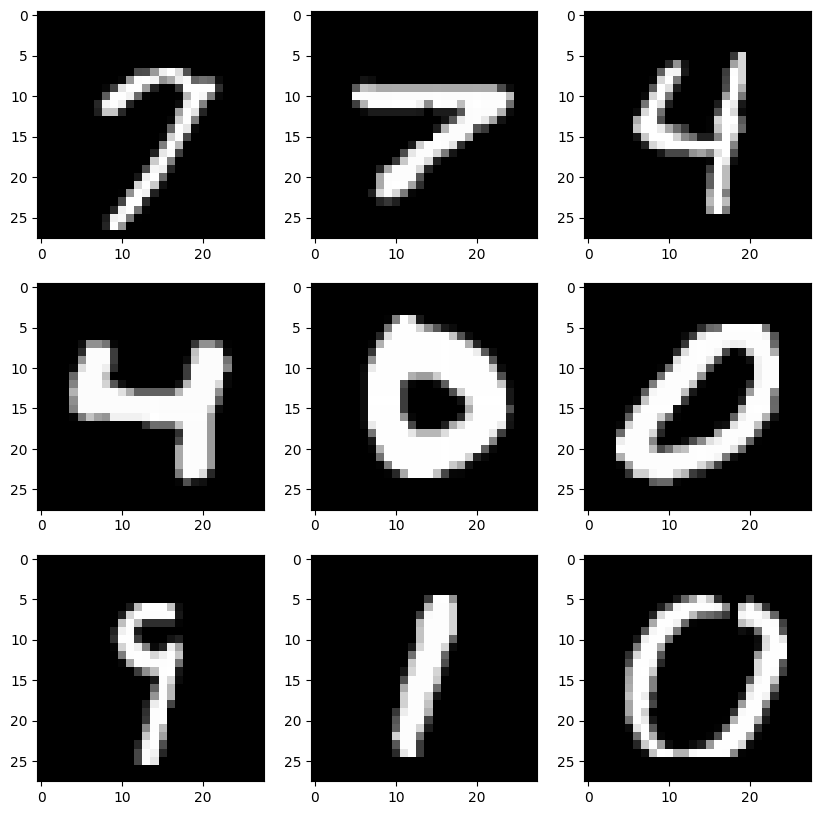

In [19]:
plt.figure(figsize=(10,10))

for i in range(0,9):
  plt.subplot(331+i)
  plt.imshow(X[i].reshape(28,28),cmap='grey')
plt.show()

In [20]:
type(y[1].flatten()[0])

numpy.int64

In [ ]:
from keras import layers
from keras.layers import Input,Dense,Activation,Flatten,Conv2D
from keras.layers import MaxPooling2D,Dropout
from keras import Sequential


In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1),padding='valid'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,714 (955.91 KB)

 Trainable params: 244,714 (955.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X,y,epochs=5,validation_split=0.2)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5286 - loss: 2.5240 - val_accuracy: 0.9140 - val_loss: 0.3099
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9503 - loss: 0.1666 - val_accuracy: 0.9635 - val_loss: 0.1559
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9802 - loss: 0.0738 - val_accuracy: 0.9580 - val_loss: 0.1865
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9830 - loss: 0.0478 - val_accuracy: 0.9680 - val_loss: 0.1248
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9859 - loss: 0.0406 - val_accuracy: 0.9690 - val_loss: 0.1479


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,img_to_array



In [ ]:
img=load_img('/content/1720267697340.jpg')

In [ ]:
data_img=img_to_array(img)

In [ ]:
data_img=np.expand_dims(data_img,0)

In [ ]:
data_img.shape

(1, 3456, 5184, 3)

In [4]:
datagen=ImageDataGenerator(
    width_shift_range=[-20,20]
    ,height_shift_range=[-20,20]
    ,rotation_range=20
    ,shear_range=1
    ,zoom_range=0.2
    ,horizontal_flip=True
    ,vertical_flip=False

)

In [ ]:
it=datagen.flow(data_img,batch_size=1)

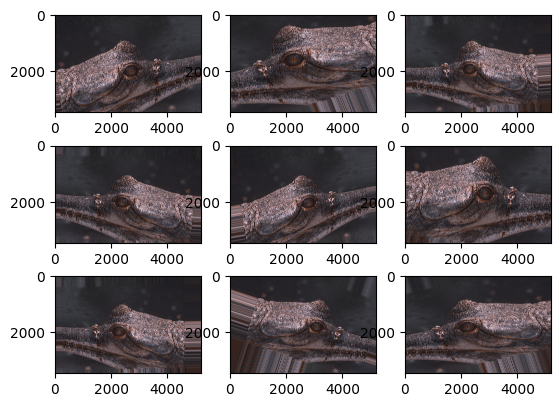

In [ ]:
for i in range(9):
  plt.subplot(330+1+i)
  batch=next(it)
  image=batch[0].astype('uint8')
  plt.imshow(image)


In [ ]:
model.fit(it,steps_per_epoch=len(it),epochs=5)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9800 - loss: 0.0666
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9902 - loss: 0.0313
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9934 - loss: 0.0199
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9938 - loss: 0.0188
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9942 - loss: 0.0193


In [5]:
train_datagen=ImageDataGenerator(
    shear_range=0.5,
    horizontal_flip=True,
    zoom_range=0.3,
     width_shift_range=[-20,20]
    ,height_shift_range=[-20,20]

)

In [6]:
test_datagen=ImageDataGenerator()

In [54]:
train_generator=train_datagen.flow_from_directory(
    '/content/train',
    color_mode='grayscale',
    target_size=(32,32),
    class_mode='binary',
    batch_size=1,
    shuffle=True
)


Found 18 images belonging to 3 classes.


In [56]:
valdiation_generator=train_datagen.flow_from_directory(
    '/content/x',
    color_mode='grayscale',
    target_size=(32,32),
    class_mode='binary',
    batch_size=1,
    shuffle=True

)

Found 10 images belonging to 2 classes.


In [60]:
from keras import layers
from keras.layers import Input,Dense,Activation,Flatten,Conv2D
from keras.layers import MaxPooling2D,Dropout
from keras import Sequential

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,1),padding='valid'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
model.fit(train_generator,
          steps_per_epoch=100,  #batch size
          epochs=100,
          validation_data=valdiation_generator)

Epoch 1/19
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.2291 - loss: -0.2823 - val_accuracy: 0.5000 - val_loss: 6.4472
Epoch 2/19
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7139 - loss: -13.3774 - val_accuracy: 0.5000 - val_loss: 33.3363
Epoch 3/19
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7223 - loss: -36.7062 - val_accuracy: 0.5000 - val_loss: 198.4529
Epoch 4/19
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6505 - loss: -127.0104 - val_accuracy: 0.5000 - val_loss: 980.4446
Epoch 5/19
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7468 - loss: -538.7118 - val_accuracy: 0.5000 - val_loss: 2479.5200
Epoch 6/19
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6630 - loss: -1189.2506 - val_accuracy: 0.5000 - val_loss: 4944.4854
Epoch 7/19
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4259 - loss: -8655.0352 - val_accuracy: 0.5000 - val_loss: 18736.9414
Epoch 8/19
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4329 - loss: -14723.8193 - val_accuracy: 0.5000 - val_loss: 54615.5117
Epoch 9/19
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5278 - loss: -15172.5107 - val_accuracy: 0.5000 - val_loss: 129010.6016
Epoch 10/19
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7288 - loss: -87320.3672 - val_accuracy: 0.5000 - val_loss: 233723.5000
Epoch 11/19
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4012